In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install PyPDF2
!pip install docx2txt

     |████████████████████████████████| 81kB 2.4MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61085 sha256=a5cf8bb9706d5fb8f47c3d7a17c592ae304ec638fb9ae85a9430085ff61fcb70
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2
  Created wheel for docx2txt: filename=docx2txt-0.8-cp36-none-any.whl size=3965 sha256=43debc24bc712f544fc23290aa5194d1973f7641e927fc31dda111de1f9dbff3
  Stored in directory: /root/.cache/pip/wheels/b2/1f/26/a051209bbb77fc6bcfae2bb7e01fa0ff941b82292ab084d596
Successfully built docx2txt


In [0]:
import numpy as np
import PyPDF2
import docx2txt
import sys

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import networkx as nx

In [0]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [0]:
def readDoc():
    name = '/content/drive/My Drive/work/Tender_uco_rfp_general_02_19_20_9f84e770f3.pdf'
    print('You have asked for the document {}'.format(name))
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
    print(choice)   
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [0]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

You have asked for the document /content/drive/My Drive/work/Tender_uco_rfp_general_02_19_20_9f84e770f3.pdf
2
<class 'str'>
The length of the file is: 962


In [0]:
def tokenize(document):
    doc_tokenizer = PunktSentenceTokenizer()
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [0]:
sentences_list = tokenize(document)
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 128
The size of the item 0 in Bytes is: 393


In [0]:
print(type(sentences_list))

<class 'list'>


In [0]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 5


In [0]:
for i in sentences_list:
    print(i)

1
 
 
 
 
 
 
 
 
Request for Proposal (RFP)
 
for
 
Corporate Agency Arrangement for
 
General Insurance Business
 
 
Reference Number
 
:   UCO/IMW/RFP/02/2019
-
20
 
 
Dated
 
:    
1
8
/
09
/2019
 
 
 
The information provided by the Bidders in response to this RFP Document will become 
the
 
property of the Bank and will not be returned.
The Bank reserves the right to amend, 
rescind, reissue this RFP Document and all amendments will be advised to the 

The Bank al
so reserves its right to accept or reject any or all the responses to this RFP 
Document without assigning any reason whatsoever and without any cost and 
compensation thereof.
This document is prepared by UCO Bank for Implementation of Corporate Agency 
Arr
angement for 
General
 
Insurance Business.
It should not be reused or copied or used 
either partially or fully in any form.
UCO BANK
 
HEAD OFFICE: 10, B T M Sarani, Kolkata 

 
700 001
 
(State 
-
 
West Bengal)


In [0]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [0]:
cv_demo = CountVectorizer() 
text_demo = ["Ashish is good, you are bad", "I am not bad"] 
res_demo = cv_demo.fit_transform(text_demo)
print('Result demo array is {}'.format(res_demo.toarray()))
print('Feature list: {}'.format(cv_demo.get_feature_names()))

Result demo array is [[0 1 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0]]
Feature list: ['am', 'are', 'ashish', 'bad', 'good', 'is', 'not', 'you']


In [0]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <5x85 sparse matrix of type '<class 'numpy.int64'>'
	with 113 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['001', '02', '09', '10', '20', '2019', '700', 'accept', 'advised', 'agency', 'al', 'all', 'amend', 'amendments', 'and', 'angement', 'any', 'arr', 'arrangement', 'assigning', 'bank', 'be', 'become', 'bengal', 'bidders', 'business', 'by', 'compensation', 'copied', 'corporate', 'cost', 'dated', 'document', 'either', 'for', 'form', 'fully', 'general', 'head', 'implementation', 'imw', 'in', 'information', 'insurance', 'is', 'it', 'its', 'kolkata', 'not', 'number', 'of', 'office', 'or', 'partially', 'prepared', 'property', 'proposal', 'provided', 'reason', 'reference', 'reissue', 'reject', 'request', 'rescind', 'reserves', 'response', 'responses', 'returned', 'reused', 'rfp', 'right', 'sarani', 'should', 'so', 'state', 'the', 'thereof'

In [0]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0.         0.1348322  0.1348322  0.         0.1348322  0.2696644
  0.         0.         0.         0.10878177 0.         0.
  0.         0.         0.10878177 0.         0.         0.
  0.1348322  0.         0.07596211 0.09029869 0.1348322  0.
  0.1348322  0.10878177 0.10878177 0.         0.         0.10878177
  0.         0.1348322  0.09029869 0.         0.32634531 0.
  0.         0.10878177 0.         0.         0.1348322  0.10878177
  0.1348322  0.10878177 0.         0.         0.         0.
  0.10878177 0.1348322  0.10878177 0.         0.         0.
  0.         0.1348322  0.1348322  0.1348322  0.         0.1348322
  0.         0.         0.1348322  0.         0.         0.1348322
  0.         0.1348322  0.         0.32634531 0.         0.
  0.         0.         0.         0.43512707 0.         0.09029869
  0.10878177 0.09029869 0.         0.         0.         0.21756354
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.11005069 0.1100506

In [0]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <85x5 sparse matrix of type '<class 'numpy.float64'>'
	with 113 stored elements in Compressed Sparse Column format>>


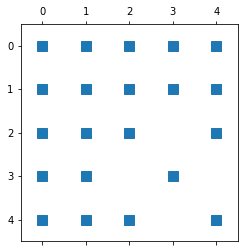

In [0]:
plt.spy(res_graph)

Number of edges 13
Number of vertices 5


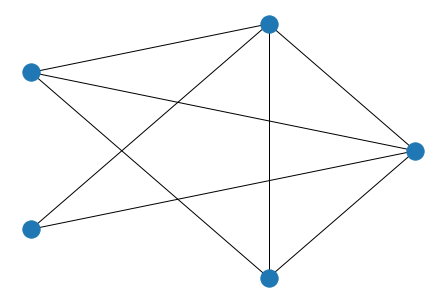

The memory used by the graph in Bytes is: 56


In [0]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [0]:

# ranks is a dictionary with key=node(sentences) and value=textrank (the rank of each of the sentences)
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])

<class 'dict'>
The size used by the dictionary in Bytes is: 240
0 0.23159524353303385
1 0.21259973411340805
2 0.19784883759409824
3 0.17836363070401434
4 0.17959255405544536


In [0]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [0]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])

In [0]:
print(rank_max)
print(rank_min)

0.23159524353303385
0.17836363070401434


In [0]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))

5


In [0]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [0]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [0]:
model = sentence_list

In [0]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close

1
 
 
 
 
 
 
 
 
Request for Proposal (RFP)
 
for
 
Corporate Agency Arrangement for
 
General Insurance Business
 
 
Reference Number
 
:   UCO/IMW/RFP/02/2019
-
20
 
 
Dated
 
:    
1
8
/
09
/2019
 
 
 
The information provided by the Bidders in response to this RFP Document will become 
the
 
property of the Bank and will not be returned. The Bank reserves the right to amend, 
rescind, reissue this RFP Document and all amendments will be advised to the 

The Bank al
so reserves its right to accept or reject any or all the responses to this RFP 
Document without assigning any reason whatsoever and without any cost and 
compensation thereof.


<function TextIOWrapper.close>

In [0]:
for lines in sentence_list:
    print(lines)

1
 
 
 
 
 
 
 
 
Request for Proposal (RFP)
 
for
 
Corporate Agency Arrangement for
 
General Insurance Business
 
 
Reference Number
 
:   UCO/IMW/RFP/02/2019
-
20
 
 
Dated
 
:    
1
8
/
09
/2019
 
 
 
The information provided by the Bidders in response to this RFP Document will become 
the
 
property of the Bank and will not be returned.
The Bank reserves the right to amend, 
rescind, reissue this RFP Document and all amendments will be advised to the 

The Bank al
so reserves its right to accept or reject any or all the responses to this RFP 
Document without assigning any reason whatsoever and without any cost and 
compensation thereof.
